# Applying Logistic Regression on Binary Classifying model 

## Import the required libraries

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

## Load the dataset

In [36]:
train_data = pd.read_csv('train_titanic.csv')
test_data = pd.read_csv('test_titanic.csv')

In [37]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [38]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [39]:
train_data.shape

(891, 12)

In [40]:
test_data.shape

(418, 11)

## Data Cleaning

In [41]:
train_data.isna().sum() , test_data.isna().sum()

(PassengerId      0
 Survived         0
 Pclass           0
 Name             0
 Sex              0
 Age            177
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Cabin          687
 Embarked         2
 dtype: int64,
 PassengerId      0
 Pclass           0
 Name             0
 Sex              0
 Age             86
 SibSp            0
 Parch            0
 Ticket           0
 Fare             1
 Cabin          327
 Embarked         0
 dtype: int64)

### Removing the Cabin column as it has more missing data

In [43]:
train_data.drop('Cabin',axis = 1, inplace = True)
test_data.drop('Cabin',axis = 1, inplace = True)

### Replacing the missing value in numeric columns with their mean

In [44]:
avg_age = train_data.Age.mean()
train_data.Age.replace(np.nan, avg_age, inplace = True)

tavg_age = test_data.Age.mean()
test_data.Age.replace(np.nan, tavg_age, inplace = True)

In [45]:
avg_fare = test_data.Fare.mean()
test_data.Fare.replace(np.nan, avg_fare, inplace = True)

### Replacing the missing data in categorical columns with their mode

In [46]:
med = train_data.Embarked.mode()[0]
train_data.Embarked.replace(np.nan, med, inplace = True)

In [47]:
train_data.isna().sum(),test_data.isna().sum()

(PassengerId    0
 Survived       0
 Pclass         0
 Name           0
 Sex            0
 Age            0
 SibSp          0
 Parch          0
 Ticket         0
 Fare           0
 Embarked       0
 dtype: int64,
 PassengerId    0
 Pclass         0
 Name           0
 Sex            0
 Age            0
 SibSp          0
 Parch          0
 Ticket         0
 Fare           0
 Embarked       0
 dtype: int64)

## Exploratory Data Analysis

<AxesSubplot:xlabel='Sex', ylabel='count'>

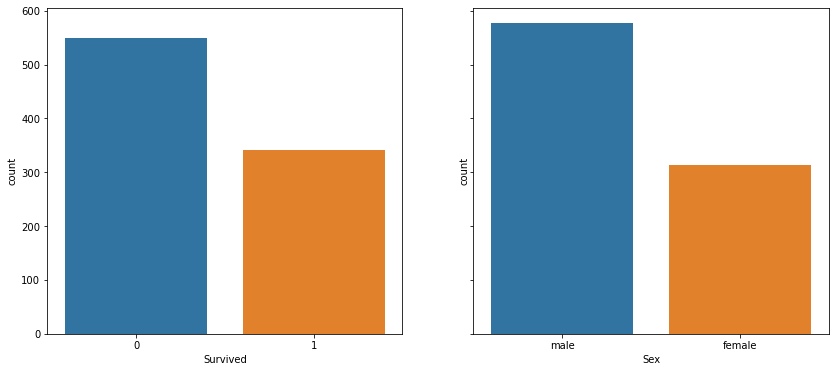

In [56]:
f,ax = plt.subplots(1,2,figsize=(14,6),sharey = True)
sns.countplot(x="Survived",data=train_data,ax = ax[0])
sns.countplot(x="Sex",data=train_data,ax = ax[1])

<AxesSubplot:xlabel='Sex', ylabel='count'>

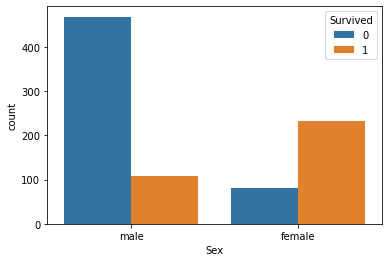

In [59]:
sns.countplot(train_data.Sex,hue = train_data.Survived)

In [61]:
train_data.groupby('Sex')['Survived'].value_counts(normalize=True)

Sex     Survived
female  1           0.742038
        0           0.257962
male    0           0.811092
        1           0.188908
Name: Survived, dtype: float64

#### Observation : Females have more chance to survive

<AxesSubplot:xlabel='Pclass', ylabel='count'>

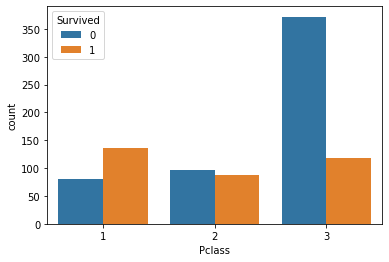

In [63]:
sns.countplot(train_data.Pclass,hue = train_data.Survived)

#### Observation : Pclass(3) has less chance to survive 

<AxesSubplot:xlabel='Age'>

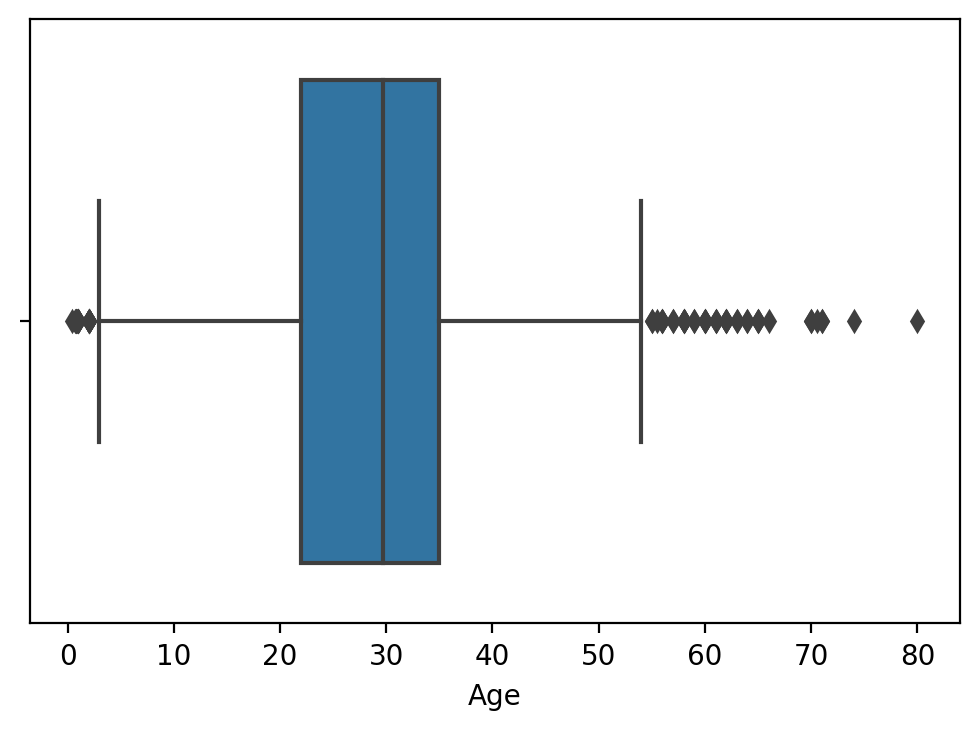

In [69]:
plt.figure(dpi=200)
sns.boxplot(train_data.Age)

<AxesSubplot:xlabel='Survived', ylabel='Age'>

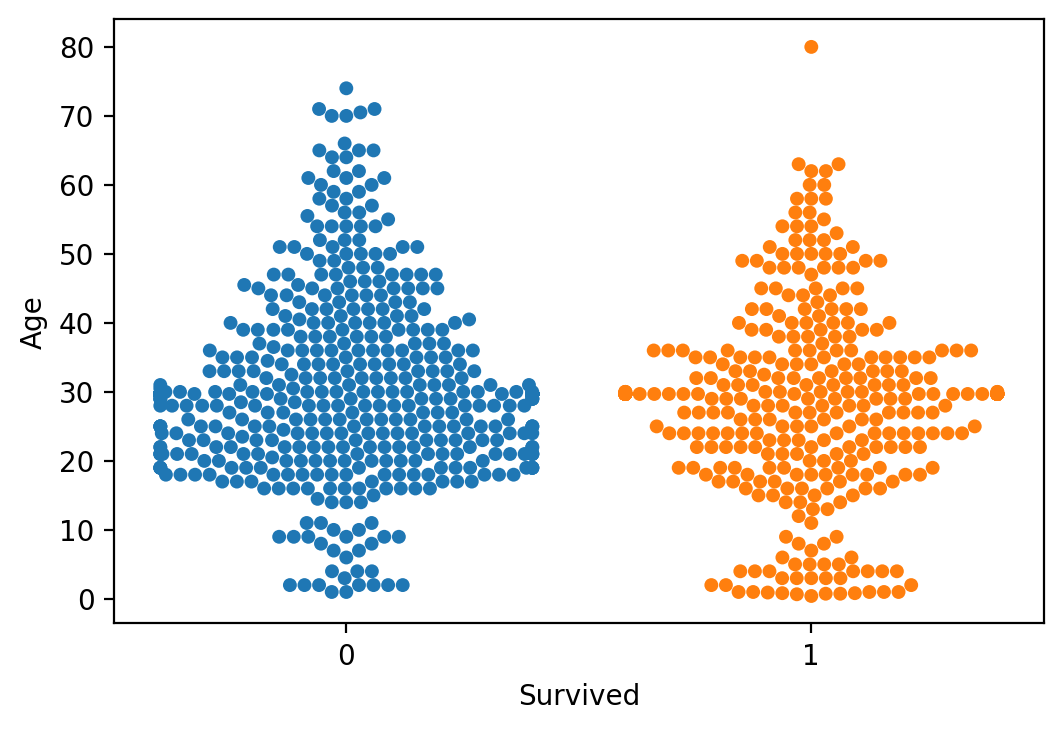

In [68]:
plt.figure(dpi=200)
sns.swarmplot(train_data.Survived,train_data.Age)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

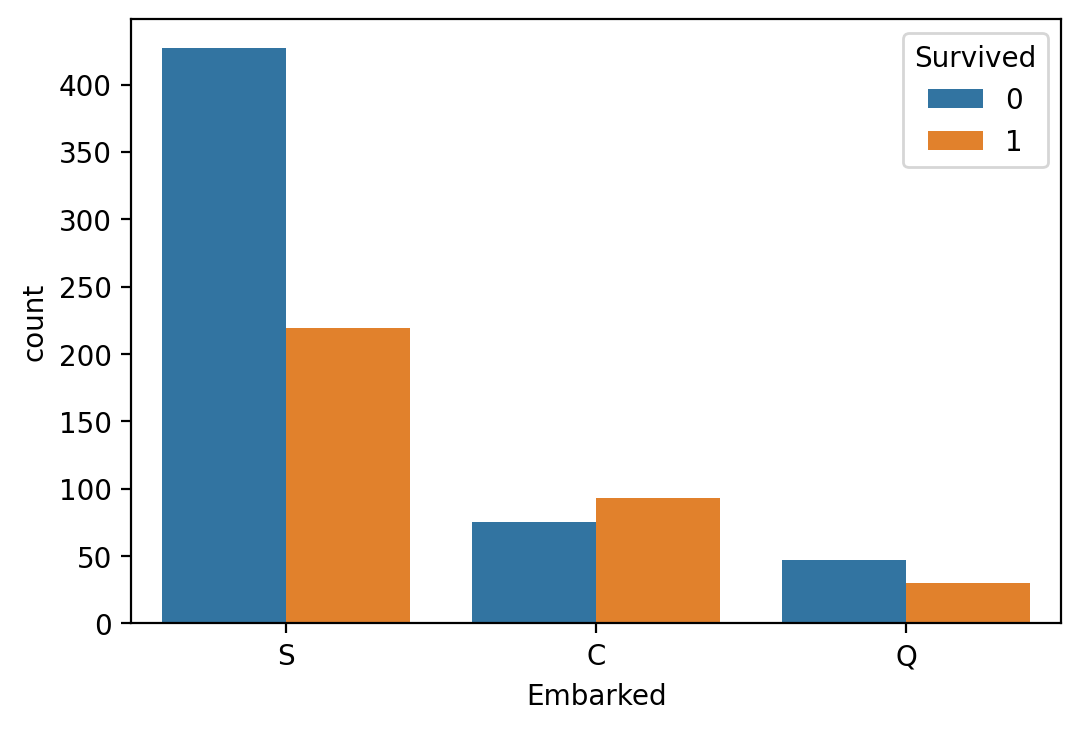

In [76]:
plt.figure(dpi=200)
sns.countplot(train_data.Embarked,hue = train_data.Survived)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

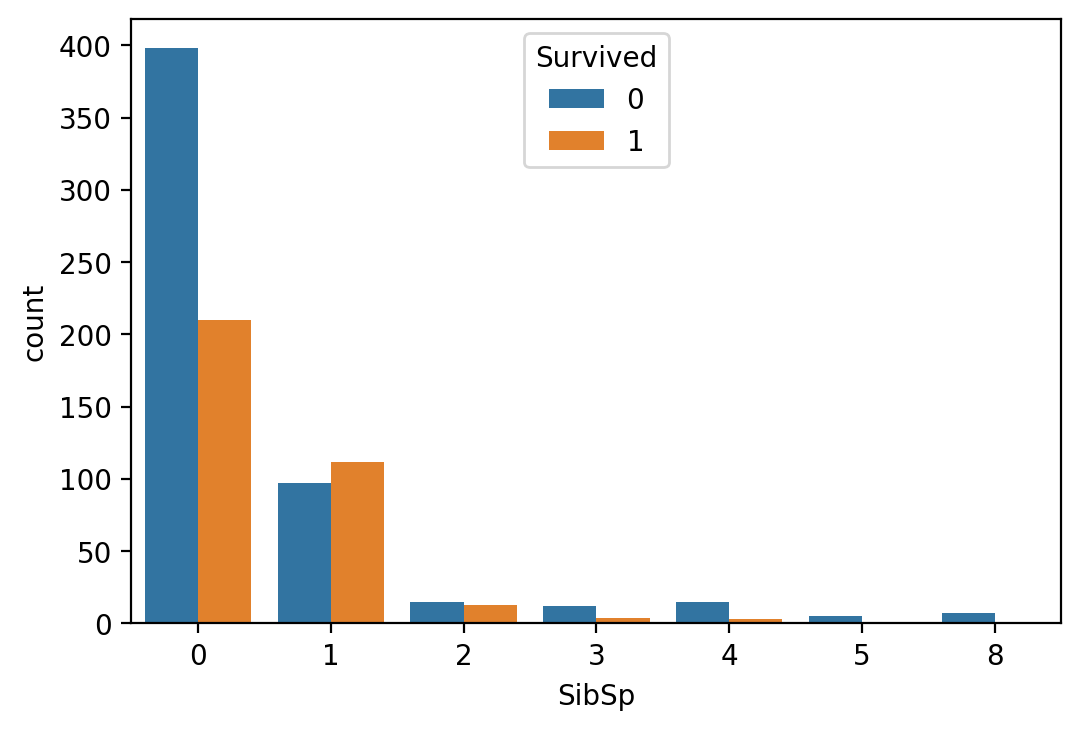

In [79]:
plt.figure(dpi=200)
sns.countplot(train_data.SibSp,hue = train_data.Survived)

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

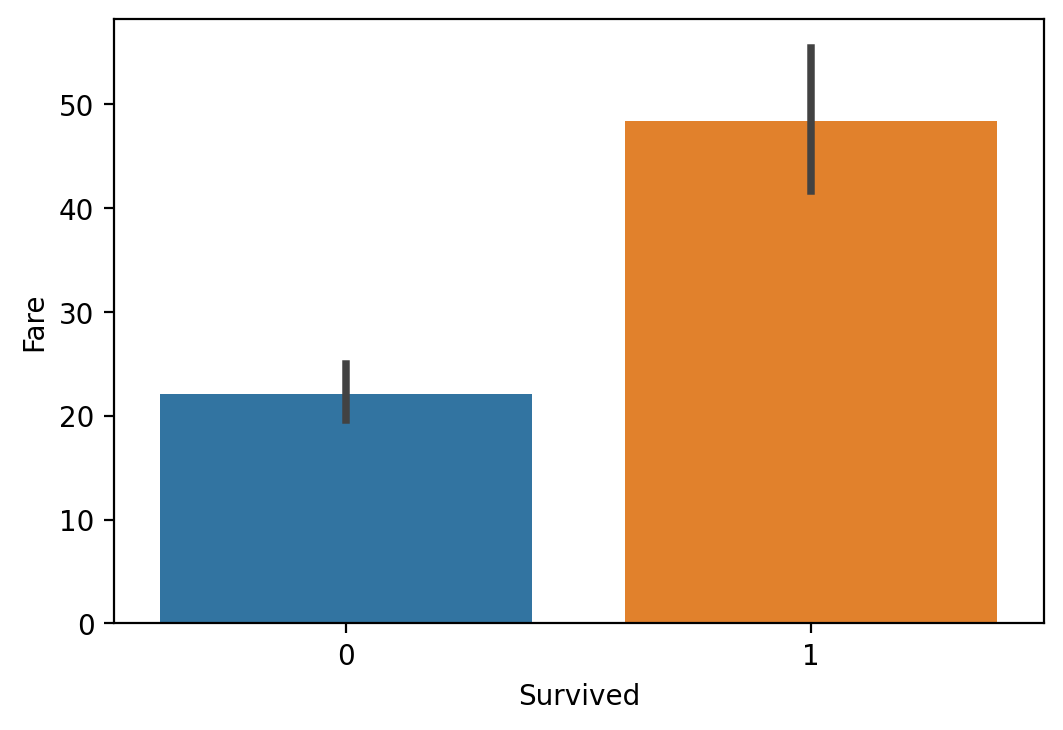

In [80]:
plt.figure(dpi=200)
sns.barplot(x='Survived',y='Fare',data=train_data)

<AxesSubplot:>

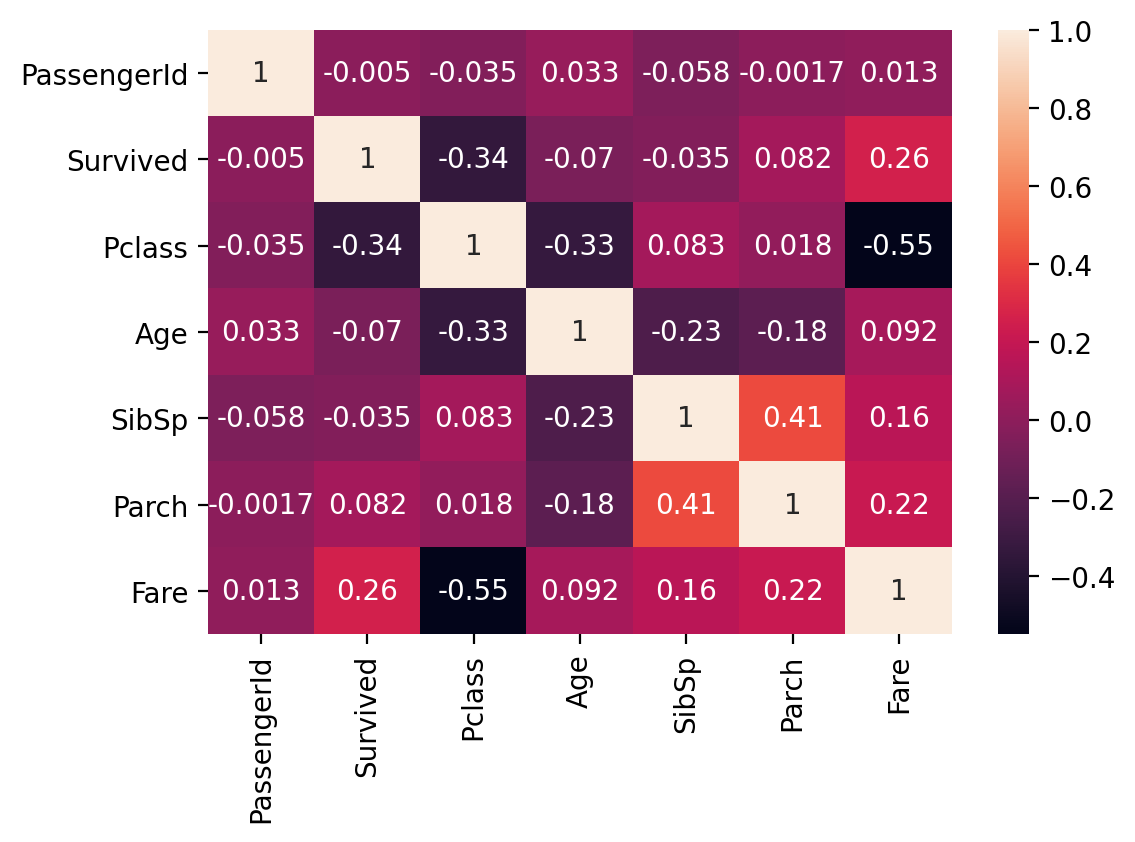

In [81]:
plt.figure(dpi=200)
sns.heatmap(train_data.corr(),annot = True)

# Deal with categorical values

In [85]:
train_data['Sex'] = train_data['Sex'].map({'female':1 , 'male':0}).astype(int)
test_data['Sex'] = test_data['Sex'].map({'female':1 , 'male':0}).astype(int)

In [86]:
train_data['Embarked'] = train_data['Embarked'].map({'S':0,'C':1,'Q':2}).astype(int)
test_data['Embarked'] = test_data['Embarked'].map({'S':0,'C':1,'Q':2}).astype(int)

In [87]:
train_data.drop(['Name','Ticket'],axis = 1, inplace = True)
test_data.drop(['Name','Ticket'],axis = 1, inplace = True)

In [88]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0
1,2,1,1,1,38.0,1,0,71.2833,1
2,3,1,3,1,26.0,0,0,7.9250,0
3,4,1,1,1,35.0,1,0,53.1000,0
4,5,0,3,0,35.0,0,0,8.0500,0


In [89]:
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,34.5,0,0,7.8292,2
1,893,3,1,47.0,1,0,7.0000,0
2,894,2,0,62.0,0,0,9.6875,2
3,895,3,0,27.0,0,0,8.6625,0
4,896,3,1,22.0,1,1,12.2875,0


# Binning

#### Dividing the age and fare into groups and labeling them 

In [90]:
dataset = [train_data,test_data]
for data in dataset:
    data.loc[data['Age'] <= 20, 'Age'] = 0
    data.loc[(data['Age'] > 20) & (data['Age']<= 40) , 'Age'] = 1
    data.loc[(data['Age'] > 40) & (data['Age']<= 60) , 'Age'] = 2
    data.loc[data['Age'] > 60, 'Age'] = 3

In [91]:
dataset = [train_data,test_data]
for data in dataset:
    data.loc[data['Fare'] <= 8, 'Fare'] = 0
    data.loc[(data['Fare'] > 8) & (data['Fare']<= 15) , 'Fare'] = 1
    data.loc[(data['Fare'] > 15) & (data['Fare']<= 31) , 'Fare'] = 2
    data.loc[data['Fare'] > 31, 'Fare'] = 3

In [92]:
for data in dataset:
    data['Age'] = data['Age'].astype(int)
    data['Fare'] = data['Fare'].astype(int)

In [93]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,1,1,0,0,0
1,2,1,1,1,1,1,0,3,1
2,3,1,3,1,1,0,0,0,0
3,4,1,1,1,1,1,0,3,0
4,5,0,3,0,1,0,0,1,0


In [94]:
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,1,0,0,0,2
1,893,3,1,2,1,0,0,0
2,894,2,0,3,0,0,1,2
3,895,3,0,1,0,0,1,0
4,896,3,1,1,1,1,1,0


## Feature Engineering

In [25]:
features = ['Sex','Pclass','Age','SibSp','Parch','Fare','Embarked']
X_train = train_data[features]
Y_train = train_data['Survived']
X_test = test_data[features]

## Splitting the dataset

In [95]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_train,Y_train,test_size=0.3,random_state=5)

## Logistic Regression
### Here we need to predict survived or not (1 or 0) which implies classification , so logistic regression model is used 

In [27]:
from sklearn.linear_model import LogisticRegression
cls = LogisticRegression()
cls.fit(x_train,y_train)                   # model training

LogisticRegression()

In [97]:
print('The training score :',(cls.score(x_train,y_train)))

The training score : 0.8025682182985554


In [98]:
print('The testing score : ',cls.score(x_test,y_test))

The testing score :  0.832089552238806


In [ ]:
predict = cls.predict(x_test)            # predictions 

In [31]:
from sklearn import metrics

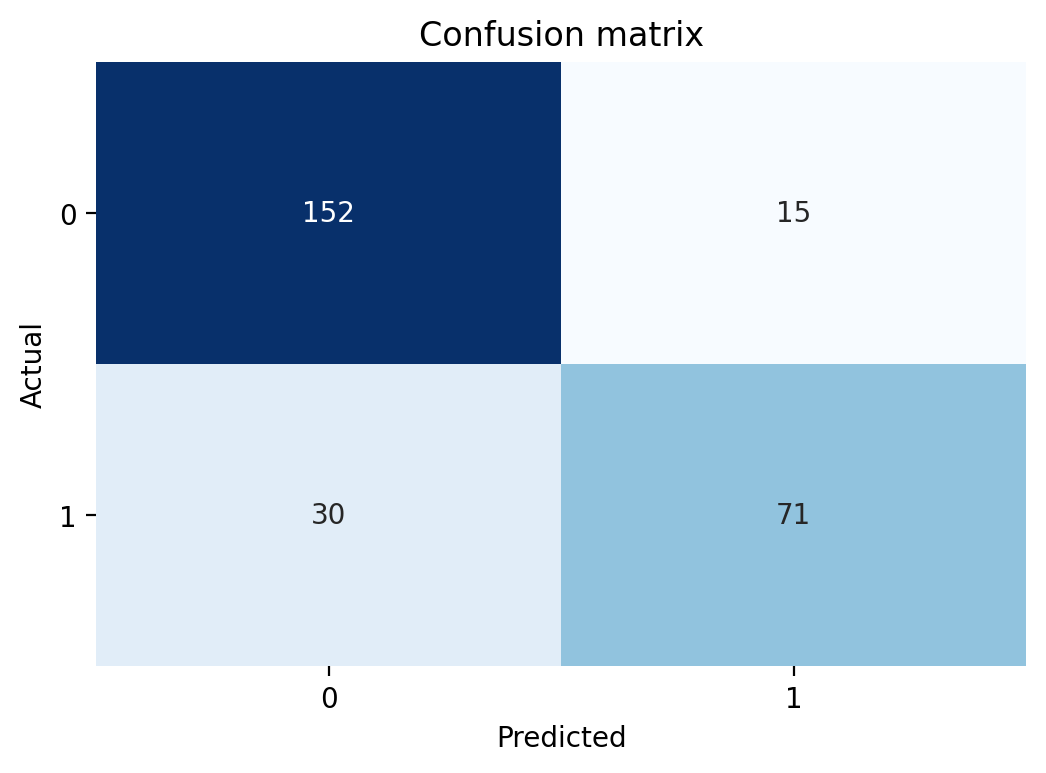

In [101]:
classes = np.unique(y_test)
fig, ax = plt.subplots(dpi=200)
cm = metrics.confusion_matrix(y_test, predict,labels = classes)
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
ax.set(xlabel="Predicted", ylabel="Actual", title="Confusion matrix")
ax.set_yticklabels(labels=classes, rotation=0)
plt.show()